#**PRAKTIKUM DATA MINING 3**
Nama: Annisa Novantika\
NIM: 121450005\
Kelas
 : RC

#**a. Selesaikan semua langkah-langkah disetiap metode yang ada pada modul ini !**

##**Praktikum 1 :  Metode PCA dan LDA**

###**1. Principal Component Analysis using the PCA implementation in scikit-learn**



**Import Packages**

kita lakukan import library yang kita perlukan

In [65]:
# Import Library
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Import dataset**

In [66]:
import pandas as pd #penggunaan Pandas dengan cara mengacu ke "pd" saat memanggil fungsi-fungsi Pandas.
from sklearn.preprocessing import StandardScaler #
TT_df = pd.read_csv('/content/HarryPotterTT.csv') #membaca sebuah file CSV dengan nama "HarryPotterTT.csv"
TT_df #Memanggil dan menampilkan data

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7
5,'Prof. McGonagail',95,19,29,76,5
6,'Prof. Moody',82,20,35,69,5
7,'Rubeus Hagrid',12,11,30,8,7
8,'Fred Weasley',87,13,30,22,4
9,'George Weasley',87,13,30,22,4


**Ekstrak data**

In [67]:
y = TT_df.pop('Name').values
X = TT_df.values
X_scal = StandardScaler().fit_transform(X)
X.shape #kita tampilkan bentuk dari framenya
#Bentuk yang didapatkan terdiri dari 22 baris dan 5 kolom

(22, 5)

**Apply PCA**

In [68]:
pcaHP = PCA(n_components=4) #membuat sebuah objek PCA dengan menyebutkan jumlah komponen utama berjumlah 4
X_r = pcaHP.fit(X_scal).transform(X_scal) #data yang telah dinormalisasi dianalisis menggunakan PCA.
pcaHP.explained_variance_ratio_ #hasilnya adalah rasio variasi yang dijelaskan oleh masing-masing komponen utama.

array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

 Ada lima fitur yang diproyeksikan ke 4 PC sehingga matriks proyeksinya 4x5 dengan code berikut :

In [69]:
# Mengakses matriks komponen utama dari analisis PCA yang telah dilakukan
pcaHP.components_

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

Output yang dihasilkan diatas merupakan matriks komponen utamanya.


**Plot ke 4 varian PC**

(0.0, 0.8)

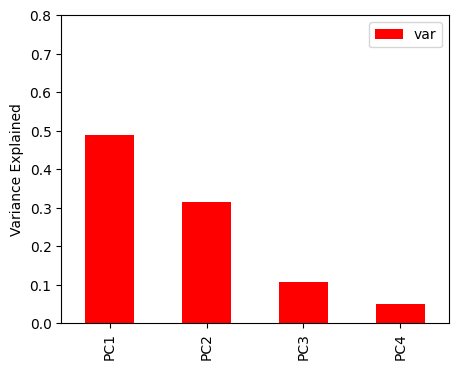

In [70]:
df = pd.DataFrame(pcaHP.explained_variance_ratio_,
                  index = ['PC1', 'PC2', 'PC3', 'PC4'], columns = ['var']) #DataFrame 'df' yang berisi rasio variasi yang dijelaskan oleh komponen utama PC1, PC2, PC3, dan PC4
pl = df.plot.bar(color = 'red', figsize = (5,4)) #Membuat grafik batang (bar plot) dari DataFrame 'df' dengan warna merah dan ukuran 5x4.
pl.set_ylabel("Variance Explained") #Memberi label "Variance Explained" pada sumbu Y grafik.
pl.set_ylim([0,0.8]) #Mengatur batas sumbu Y dari 0 hingga 0.8 pada grafik untuk membatasi tampilan tinggi batang.

**Plot persebaran data dengan PC1 dan PC2**

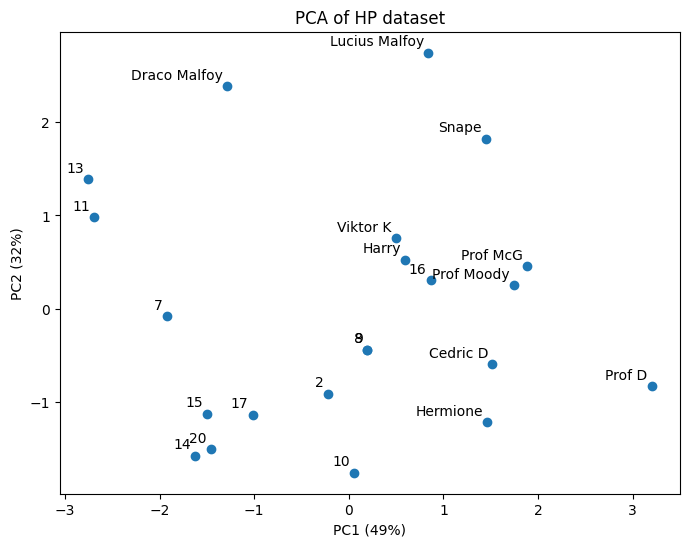

In [71]:
# Plot pesebaran data dengan PC1 dan PC2
plt.figure(figsize=(8,6))
lw = 2 #menentukan lebar garis (line width) yang akan digunakan dalam plot.
labels = list(range(len(y))) #Membuat sebuah daftar (list) label yang akan digunakan dalam plot. Label ini berdasarkan panjang data "y" yang kemungkinan merupakan label data.
labels[0] = 'Harry' #label tertentu diganti untuk beberapa indeks tertentu seperti ini
labels[1] = 'Hermione'
labels[3] = 'Prof D'
labels[5] = 'Prof McG'
labels[6] = 'Prof Moody'
labels[18] = 'Cedric D'
labels[19] = 'Viktor K'
labels[21] = 'Lucius Malfoy'
labels[4] = 'Snape'
labels[12] = 'Draco Malfoy'

plt.scatter(X_r[:, 0], X_r[:, 1]) #membuat scatter plot (plot penyebaran) dari data menggunakan komponen utama PC1 (disebut pada sumbu X) dan PC2 (disebut pada sumbu Y) dari "X_r

for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]): #menambahkan label ke titik-titik pada plot
  plt.annotate(
      label,
      xy = (xi, yi), xytext=(-3, 3),
      textcoords='offset points', ha='right',va='bottom')
#menambahkan label pada sumbu X dan Y dengan menunjukkan bahwa sumbu X adalah PC1 dan sumbu Y adalah PC2
plt.xlabel('PC1 (49%)')
plt.ylabel('PC2 (32%)')
plt.title('PCA of HP dataset')

plt.show() #menunjukkan plotnya

PC ini menyumbang 81% varian data. Dapat dikatakan bahwa PC pertama
mencerminkan competence dan PC kedua mewakili malevolence.Plot ini menunjukkan data yang diproyeksikan ke 2 PC pertama.


###**2. Linear Discriminant Analysis using the LDA implementation in scikit-learn**

**Import Packages**

In [72]:
# Import Packages
import pandas as pd  # Impor Pandas untuk bekerja dengan DataFrames
import numpy as np  # Impor NumPy untuk operasi matematika dan manipulasi array
from sklearn.model_selection import train_test_split  # Impor modul train_test_split untuk membagi dataset
from sklearn.preprocessing import StandardScaler  # Impor modul StandardScaler untuk normalisasi data
from collections import Counter  # Impor modul Counter untuk menghitung frekuensi elemen
from sklearn.metrics import accuracy_score  # Impor modul accuracy_score untuk mengukur akurasi
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Impor modul LinearDiscriminantAnalysis
from sklearn.decomposition import PCA  # Impor modul PCA
import matplotlib.pyplot as plt  # Impor Matplotlib untuk membuat visualisasi
%matplotlib inline

**Import dataset**

In [73]:
# Import Dataset
penguins_df = pd.read_csv('/content/penguins.csv', index_col=0)  # Membaca dataset dari file CSV dan menggunakannya sebagai DataFrame
y = penguins_df.pop('species').values  # Mengambil kolom 'species' sebagai target (label) dan menyimpannya dalam array 'y'
X_raw = penguins_df.values  # Mengambil seluruh kolom yang tersisa sebagai fitur dan menyimpannya dalam array 'X_raw'

# Membagi data menjadi subset pelatihan dan pengujian
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Melakukan normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr_raw)  # Melakukan normalisasi pada subset pelatihan
X_test = scaler.transform(X_ts_raw)  # Melakukan normalisasi pada subset pengujian

# Mendapatkan nama-nama fitur dari dataset
feature_names = penguins_df.columns

# Mencetak bentuk dataset dan menampilkan beberapa data pertama
print(penguins_df.shape)  # Mencetak bentuk DataFrame 'penguins_df'
penguins_df.head()  # Menampilkan lima baris pertama dari DataFrame 'penguins_df'


(333, 4)


,bill_length,bill_depth,flipper_length,body_mass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


**Menampilkan data y**

In [74]:
# Menggunakan Counter dari koleksi Counter untuk menghitung frekuensi masing-masing elemen dalam array 'y'
types = list(Counter(y).keys())
# Mencetak 'types' yang berisi daftar kunci (keys) hasil perhitungan frekuensi elemen dalam 'y'
types

['Adelie', 'Gentoo', 'Chinstrap']

**Apply LDA**

In [75]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_tr_lda = lda.transform(X_train)
X_tr_lda.shape

(166, 2)

Bentuk atau shape dari dataset penguins yang ka dapatkan terdiri dari 166 baris dan 2 kolom

**Plot LDA**

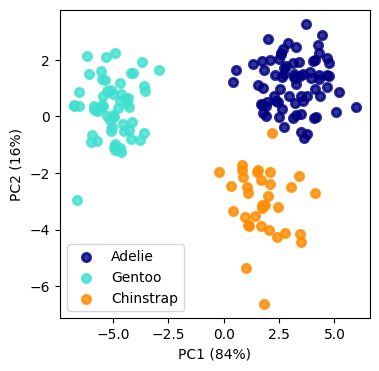

In [76]:
# Plot LDA
plt.figure(figsize=(4, 4))  # Mengatur ukuran plot menjadi 4x4 inci
colors = ['navy', 'turquoise', 'darkorange']  # Daftar warna yang akan digunakan dalam plot
lw = 2  # Lebar garis (line width) yang akan digunakan dalam plot

# Melakukan iterasi melalui warna dan nama target (label)
for color, target_name in zip(colors, types):
  # Membuat scatter plot untuk setiap target dengan warna yang sesuai
  plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
              color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)  # Menambahkan legenda ke plot
plt.xlabel('PC1 (84%)')  # Memberi label sumbu X
plt.ylabel('PC2 (16%)')  # Memberi label sumbu Y

plt.show()  # Menampilkan plot kita


**Hitung akurasi**

In [77]:
#Hitung akurasi
# Menggunakan model LDA yang telah dilatih untuk membuat prediksi terhadap data uji ('X_test')
y_pred = lda.predict(X_test)
# Mengukur akurasi prediksi dengan membandingkan prediksi ('y_pred') dengan nilai sebenarnya ('y_test')
accuracy = accuracy_score(y_pred, y_test)
# Mencetak akurasi
accuracy


0.9700598802395209

Dari ouput yang dihasilkan dapat dilihat bahwa nilai akurasi yang didapati sebesar 97%







**Penggunaan PCA**

In [78]:
# Mencari dengan teknik PCA 4 komponen
pca = PCA(n_components = 4)
X_tr_pca = pca.fit(X_train).transform(X_train)
# Melihat rasio dari teknik PCA yang dilakukan
pca.explained_variance_ratio_

array([0.67991833, 0.20387145, 0.08721252, 0.0289977 ])

**Plot PCA untuk perbandingan**

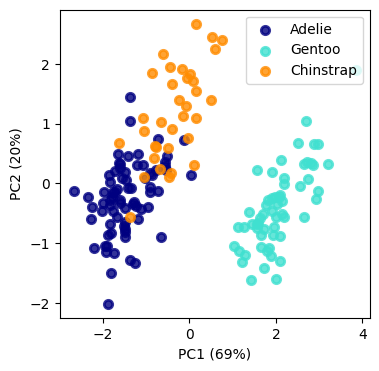

In [79]:
# Plot PCA untuk perbandingan
plt.figure(figsize=(4, 4))  # Mengatur ukuran plot menjadi 4x4 inci
lw = 2  # Lebar garis (line width) yang akan digunakan dalam plot

# Melakukan iterasi melalui warna dan nama target (label)
for color, target_name in zip(colors, types):
  # Membuat scatter plot untuk setiap target dengan warna yang sesuai
  plt.scatter(X_tr_pca[y_train == target_name, 0], X_tr_pca[y_train == target_name, 1],
              color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)  # Menambahkan legenda ke plot
plt.xlabel('PC1 (69%)')  # Memberi label sumbu X
plt.ylabel('PC2 (20%)')  # Memberi label sumbu Y

plt.show()  # Menampilkan plot


##**Praktikum 2 : Metode Filter**

###**1.  Feature Selection using Filters**

**Import Packages**

In [80]:
# Import Packages
import pandas as pd  # Impor Pandas untuk bekerja dengan DataFrames
import numpy as np  # Impor NumPy untuk operasi matematika dan manipulasi array
from sklearn.feature_selection import chi2, mutual_info_classif  # Impor modul chi2 dan mutual_info_classif untuk seleksi fitur
from sklearn.model_selection import train_test_split  # Impor modul train_test_split untuk membagi dataset
from sklearn.preprocessing import MinMaxScaler  # Impor modul MinMaxScaler untuk penskalaan fitur
from sklearn.model_selection import cross_val_score  # Impor modul cross_val_score untuk validasi silang
import matplotlib.pyplot as plt  # Impor Matplotlib untuk membuat visualisasi

**Import dataset**

In [81]:
seg_data = pd.read_csv('/content/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


**Mengitung data pada variabel target**

Dilakukan perhitungan pada variabel class dengan perkategori yang ada dalam variabel class tersebut

In [82]:
seg_data['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

**Split data**

In [83]:
y = seg_data.pop('Class').values  # Mengambil kolom 'Class' sebagai target (label) dan menyimpannya dalam array 'y'
X_raw = seg_data.values  # Mengambil seluruh kolom yang tersisa sebagai fitur dan menyimpannya dalam array 'X_raw'

# Membagi data menjadi subset pelatihan dan pengujian
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Melakukan penskalaan fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)  # Melakukan penskalaan pada subset pelatihan
X_test = scaler.transform(X_ts_raw)  # Melakukan penskalaan pada subset pengujian

# Mendapatkan nama-nama fitur dari dataset
feature_names = seg_data.columns

# Mengecek bentuk (shape) subset pelatihan dan pengujian setelah penskalaan
X_train.shape, X_test.shape  # Mencetak bentuk (shape) dari X_train dan X_test


((1155, 19), (1155, 19))

Output yang dihsilkan adalah ukuran dari dataset train dan ukuran dataset shapenya

**Feature Scores**

In [84]:
# Menghitung skor chi-squared (chi2_score) dan p-value untuk setiap fitur terhadap target
chi2_score, pval = chi2(X_train, y_train)
# Menggantikan nilai-nilai NaN dengan 0 menggunakan np.nan_to_num
chi2_score = np.nan_to_num(chi2_score)
# Kita tampilkan hasil skor chi-squared
chi2_score

array([ 14.99569813, 114.86161054,   0.        ,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [85]:
# Menghitung skor Mutual Information (i_scores) antara setiap fitur dan target
i_scores = mutual_info_classif(X_train, y_train)
i_scores # Hasil skor Mutual Information

array([0.14726416, 0.95249491, 0.        , 0.        , 0.05239215,
       0.48921504, 0.3191083 , 0.4613822 , 0.36277852, 1.15910598,
       1.21682823, 1.09539984, 1.14049077, 0.77827464, 0.91375265,
       0.96791372, 1.13840652, 0.93085902, 1.13328842])

**Simpan skor**

In [86]:
# Membuat DataFrame 'df' dengan kolom Mutual Information, Chi Square, dan Feature
df = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square': chi2_score, 'Feature': feature_names})
# Menetapkan kolom 'Feature' sebagai indeks DataFrame
df.set_index('Feature', inplace=True)
# Mengurutkan DataFrame berdasarkan skor Mutual Information secara menurun (descending)
df.sort_values('Mutual Info.', inplace=True, ascending=False)
# Menampilkan DataFrame 'df'
df

,Mutual Info.,Chi Square
Feature,,
RAWRED-MEAN,1.216828,290.963800
INTENSITY-MEAN,1.159106,293.436006
RAWGREEN-MEAN,1.140491,290.117395
VALUE-MEAN,1.138407,287.668916
HUE-MEAN,1.133288,268.862214
RAWBLUE-MEAN,1.095400,303.477831
EXGREEN-MEAN,0.967914,92.917809
REGION-CENTROID-ROW,0.952495,114.861611
SATURATION-MEAN,0.930859,81.646548


sehingga dapat dilihat pada tabel data papan score diatas, dijabarkan secara menurun untuk nilainya

**Plotting the Filter score**

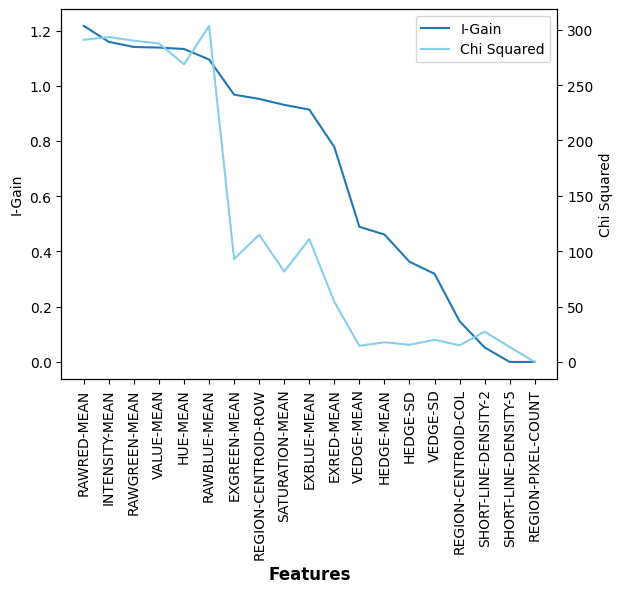

In [87]:
fig, ax = plt.subplots() # Membuat sebuah objek subplot dengan dua sumbu Y yang berbeda
rr = range(0, len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df["Mutual Info."], label="I-Gain") # Membuat plot untuk skor Mutual Information (I-Gain)

ax2.plot(df.index, df["Chi Square"], color='skyblue', label='Chi Squared') # Membuat plot untuk skor Chi-Square dengan warna skyblue

ax.set_xticks(rr) # Mengatur label sumbu X dan mengatur label tick pada sumbu X
ax.set_xticklabels(list(df.index), rotation=90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')

ax.set_ylabel('I-Gain') # Mengatur label sumbu Y untuk masing-masing sumbu
ax2.set_ylabel('Chi Squared')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes) # Menambahkan legenda ke grafik



**Hitung korelasi**

In [88]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.9135586662701755, pvalue=4.709274037943596e-08)

###**2. Correlation Based Feature Selection (CFS)**

**Import Packages**

In [89]:
# Import Packages
import pandas as pd  # Impor Pandas untuk bekerja dengan DataFrames
import numpy as np  # Impor NumPy untuk operasi matematika dan manipulasi array
from sklearn.model_selection import train_test_split  # Impor modul train_test_split untuk membagi dataset
from sklearn.preprocessing import MinMaxScaler  # Impor modul MinMaxScaler untuk penskalaan fitur
from sklearn.neighbors import KNeighborsClassifier  #  Impor modul KNeighborsClassifier untuk KNN
from sklearn.metrics import accuracy_score  # Impor modul accuracy_score untuk mengukur akurasi
from sklearn.model_selection import cross_val_score  # Impor modul cross_val_score untuk validasi silang
import matplotlib.pyplot as plt  # Impor Matplotlib untuk membuat visualisasi
from matplotlib.ticker import MaxNLocator  # Impor modul MaxNLocator untuk mengatur label sumbu Y pada plot

**Import CFS**

In [90]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

In [91]:
seg_data = pd.read_csv('/content/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [92]:
y = seg_data.pop('Class').values
X_raw = seg_data.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [93]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 0.946
Hold Out testing all features: 0.940


###**Forward Search - CFS**





In [94]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.43951449 0.44021037]
Selected Feature index: (17, 18)


In [95]:
# Print the selected features
feature_names_sel = seg_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN'], dtype='object')

**Evaluation on Test Data**

In [96]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.874
Hold Out testing selected features: 0.847


###**Best First Search - CFS**

In [97]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([17, 18,  8,  6, 10,  9])

In [98]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN', 'HEDGE-SD', 'VEDGE-SD', 'RAWRED-MEAN',
       'INTENSITY-MEAN'],
      dtype='object')

In [99]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.43951448818147326,
 0.44021037374992716,
 0.43767125770380755,
 0.43619307358905546,
 0.43539938594841915,
 0.4339188253042891]

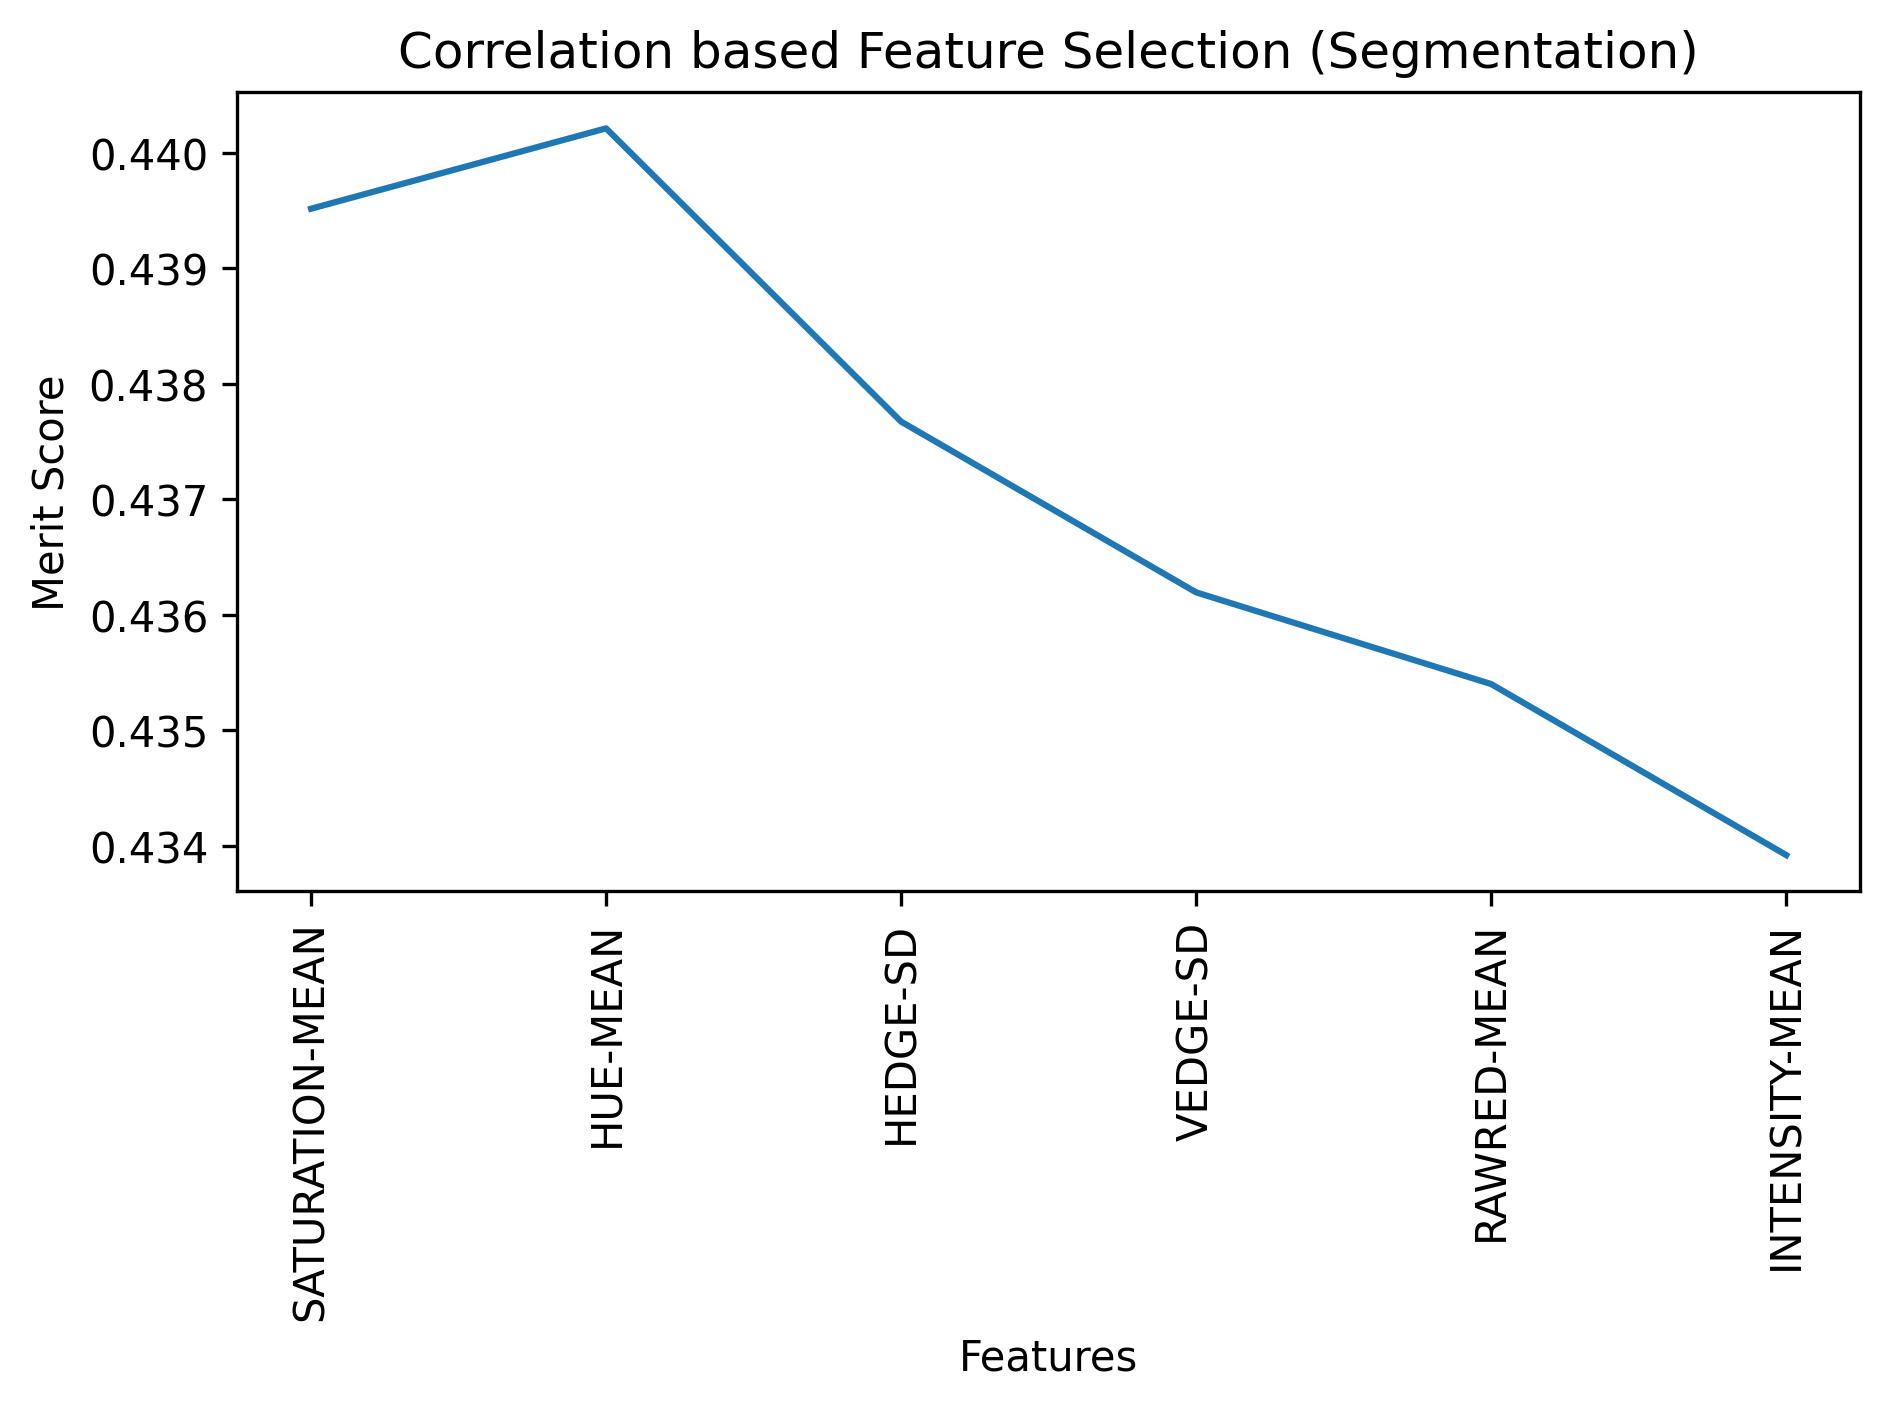

In [100]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Segmentation)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

**Evaluate on test data**

In [101]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 0.900
Hold Out testing selected features: 0.887


**Plot Results**

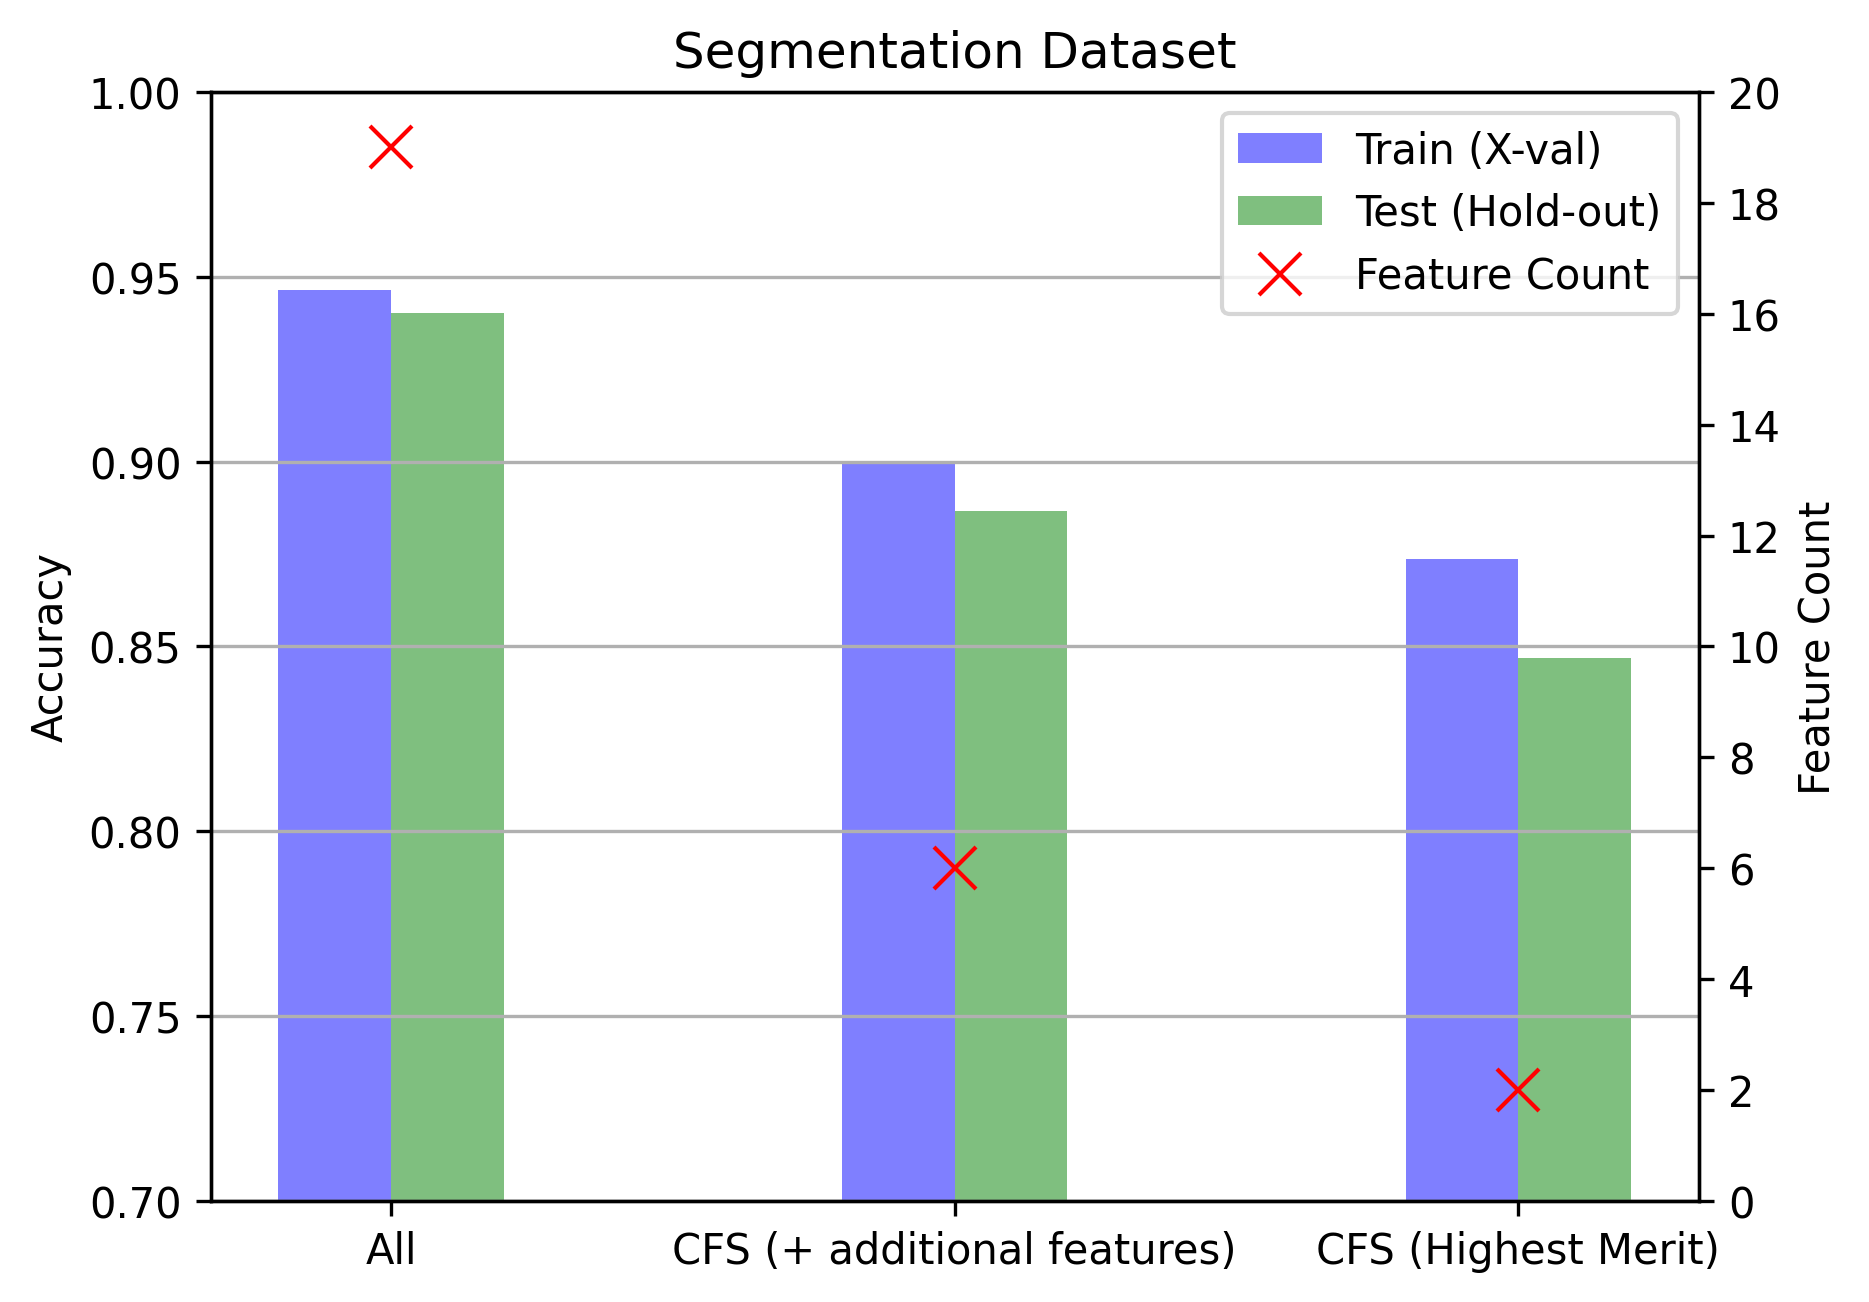

In [102]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Segmentation Dataset")
plt.show()

##**Praktikum 3 : Metode Embedded (D-Tree)**

**Import Packages**

In [103]:
# Import Packages
import pandas as pd  # Impor Pandas untuk bekerja dengan DataFrames
import numpy as np  # Impor NumPy untuk operasi matematika dan manipulasi array
from sklearn.model_selection import train_test_split  # Impor modul train_test_split untuk membagi dataset
from sklearn.metrics import accuracy_score  # Impor modul accuracy_score untuk mengukur akurasi
from sklearn.model_selection import cross_val_score  # Impor modul cross_val_score untuk validasi silang
from sklearn.tree import DecisionTreeClassifier  # Impor modul DecisionTreeClassifier untuk pohon keputusan
from sklearn import tree  # Impor modul tree untuk visualisasi pohon keputusan
import matplotlib.pyplot as plt  # Impor Matplotlib untuk membuat visualisasi

**Import Dataset**

In [104]:
# Membaca dataset dari file CSV ('penguins.csv') dan menjadikan kolom pertama sebagai indeks
penguins_df = pd.read_csv('penguins.csv', index_col=0)
feature_names = penguins_df.columns # Mendapatkan nama-nama fitur dari dataset
print(penguins_df.shape) # Mencetak bentuk dataset (jumlah baris dan kolom) menggunakan penguins_df.shape

penguins_df.head() # Menampilkan lima baris pertama dari dataset menggunakan penguins_df.head()

(333, 5)


,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


**Hitung data pada variabel target**

ini untuk menghitung banyak kategori dalam variabel kolom spesies

In [105]:
penguins_df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [106]:
y = penguins_df.pop('species').values
X = penguins_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 1, test_size = 1/2)
feature_names = penguins_df.columns
X_train.shape, X_test.shape

((166, 4), (167, 4))

dapat dilihat untuk ukuran dari data train (166, 4) dan data test (167, 4)

**Tree with no pruning (Full Tree)**

In [107]:
# Membuat objek DecisionTreeClassifier dengan kriteria 'entropy'
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train) # Melatih model Decision Tree menggunakan data pelatihan (X_train, y_train)
y_pred = ftree.predict(X_test) # Memprediksi target pada data pengujian (X_test)
acc = accuracy_score(y_pred, y_test) # Mengukur akurasi model dengan membandingkan prediksi dengan label yang sebenarnya
print("Test set accuracy: %4.2f" % (acc)) # Mencetak akurasi model pada data pengujian

Test set accuracy: 0.93


**Plot D-Tree**

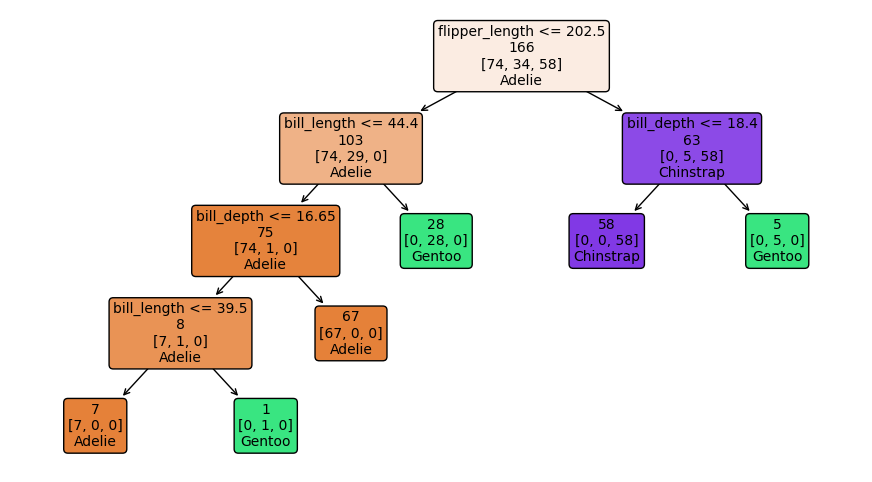

In [108]:
# Membuat gambar dengan ukuran 11x6 inci
plt.figure(figsize=(11, 6))
tree.plot_tree(ftree, fontsize=10, feature_names=feature_names, # Menggunakan fungsi tree.plot_tree() untuk membuat visualisasi pohon keputusan
               class_names=['Adelie', 'Gentoo', 'Chinstrap'],
               label='none', filled=True, impurity=False,
               rounded=True)
plt.show() # Kita tampilkan visualisasi plotnya

In [109]:
# Mengambil pentingnya masing-masing fitur dari model Decision Tree
fi = ftree.feature_importances_

# Melakukan iterasi melalui setiap nilai pentingnya dan nama fitur
for fi_val, f_name in zip(fi, feature_names):
    # Mencetak nilai pentingnya dan nama fitur
    print("%4.2f %s" % (fi_val, f_name))

0.34 bill_length
0.11 bill_depth
0.55 flipper_length
0.00 body_mass


In [110]:
ftree.get_n_leaves() # Hitung jumlah daunnya

6

**Pruned Tree**

In [111]:
# Membuat objek DecisionTreeClassifier dengan kriteria 'entropy' dan membatasi jumlah daun maksimum menjadi 3
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)
p_tree = p_tree.fit(X_train, y_train) # Melatih model Decision Tree dengan data pelatihan (X_train, y_train)
y_pred = p_tree.predict(X_test) # Memprediksi target pada data pengujian (X_test)
acc = accuracy_score(y_pred, y_test) # Mengukur akurasi model dengan membandingkan prediksi dengan label yang sebenarnya
print("Test set accuracy: %4.2f" % (acc)) # Mencetak akurasi model pada data pengujian

Test set accuracy: 0.89


**Plot D-Tree**

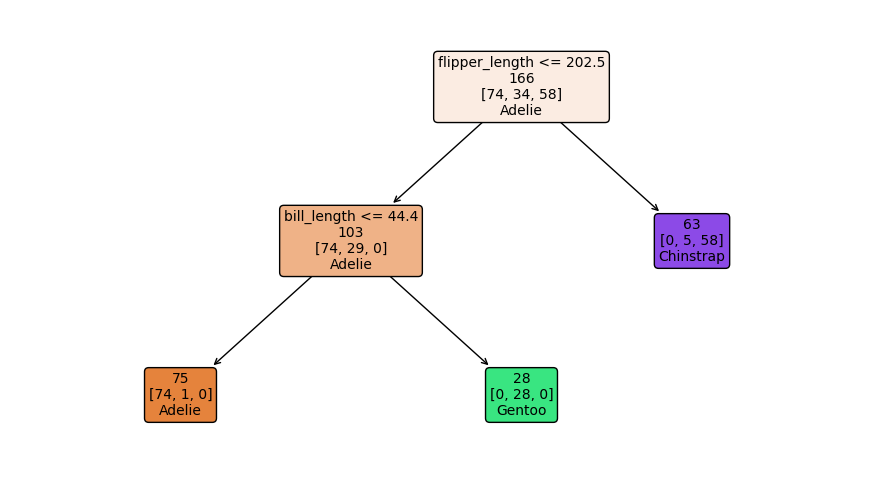

In [112]:
# Membuat gambar dengan ukuran 11x6 inci
plt.figure(figsize=(11, 6))

# Menggunakan fungsi tree.plot_tree() untuk membuat visualisasi pohon keputusan
tree.plot_tree(p_tree, fontsize=10, feature_names=feature_names,
               class_names=['Adelie', 'Gentoo', 'Chinstrap'],
               label='none', filled=True, impurity=False,
               rounded=True)

# Menampilkan visualisasi pohon keputusannya
plt.show()

**Menampilkan fitur penting**

In [113]:
# Mengambil pentingnya masing-masing fitur dari model Decision Tree yang dibatasi jumlah daun maksimum
fi = p_tree.feature_importances_

# Melakukan iterasi melalui setiap nilai pentingnya dan nama fitur
for fi_val, f_name in zip(fi, feature_names):
    # Mencetak nilai pentingnya dan nama fitur
    print("%4.2f %s" % (fi_val, f_name))

0.37 bill_length
0.00 bill_depth
0.63 flipper_length
0.00 body_mass


##**Praktikum 4 : Permutation Feature**

###**1. Permutation Feature Importance**

**Import Packages**

In [114]:
# Import Packages
import pandas as pd  # Impor Pandas untuk bekerja dengan DataFrames
import numpy as np  # Impor NumPy untuk operasi matematika dan manipulasi array
from sklearn.inspection import permutation_importance  # Impor modul permutation_importance untuk menghitung pentingnya fitur
from sklearn import preprocessing  # Impor modul preprocessing untuk penskalaan fitur
from sklearn.metrics import accuracy_score  # Impor modul accuracy_score untuk mengukur akurasi
from sklearn.model_selection import cross_val_score  # Impor modul cross_val_score untuk validasi silang
from sklearn.neighbors import KNeighborsClassifier  # Impor modul KNeighborsClassifier untuk KNN
from sklearn.model_selection import train_test_split  # Impor modul train_test_split untuk membagi dataset
import matplotlib.pyplot as plt  # Impor Matplotlib untuk membuat visualisasi

**Import dataset**

In [115]:
# Membuat daftar nama kolom (col_heads) dengan label '0' hingga '33', dan menambahkan kolom 'Class'
col_heads = [str(x) for x in range(34)]
col_heads.append('Class')
ion_data = pd.read_csv('/content/ionosphere.csv', names=col_heads, na_values='?', header=None) # Membaca dataset dari file CSV dan menetapkan nama kolom sesuai dengan col_heads
ion_data.dropna(axis=0, inplace=True) # Menghapus baris yang berisi nilai-nilai yang hilang (NaN)
print(ion_data.shape) # Mencetak bentuk dataset (jumlah baris dan kolom)
ion_data.head() # Menampilkan lima baris pertama dari dataset

(351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


**Split data**

kita lakukan split datasetnya untuk dijadikan antara dataset train dan dataset testing

In [116]:
# Split Data
y = ion_data.pop('Class').values
X = ion_data
ion_scaler = preprocessing. MinMaxScaler().fit(X)
X_scaled = ion_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size=1/2)

**Final results dataframe**

In [117]:
res_df = pd.DataFrame([['All Features',0.0, 0.0],
                       ['After PI',0.0,0.0],
                       ['After Wrapper',0.0, 0.0]], columns=['Method', 'X_Val', 'Hold-Out'])
res_df.set_index('Method', inplace = True)

**Akurasi**

In [118]:
# Membuat objek KNeighborsClassifier dengan jumlah tetangga terdekat (n_neighbors) sebanyak 3
kNN = KNeighborsClassifier(n_neighbors=3)

# Melatih model KNN dengan data pelatihan (X_train, y_train)
kNN = kNN.fit(X_train, y_train)

# Memprediksi target pada data pengujian (X_test)
y_pred = kNN.predict(X_test)

# Mengukur akurasi model dengan membandingkan prediksi dengan label yang sebenarnya
acc = accuracy_score(y_pred, y_test)

# Menghitung akurasi melalui validasi silang dengan 8 lipatan (cv=8)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

# Menyimpan hasil akurasi validasi silang dan akurasi hold-out testing dalam DataFrame 'res_df'
res_df.loc['All Features']['X-Val'] = cv_acc.mean()
res_df.loc['All Features']['Hold-Out'] = acc

# Mencetak akurasi hasil validasi silang dan hold-out testing
print("X-Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold-Out testing all features: {0:.3f}".format(acc))


X-Val on training all features: 0.818
Hold-Out testing all features: 0.795


**Permutation feature importance stage**

Tampilkan Permuation Importance

In [119]:
# Menggunakan permutation_importance untuk menghitung pentingnya fitur pada model KNN
# - 'kNN' adalah model KNN yang telah dilatih
# - 'X_train' adalah data pelatihan
# - 'y_train' adalah target pelatihan
# - 'n_repeats' adalah jumlah perulangan permutasi yang dilakukan (dalam contoh ini, 10 perulangan)
# - 'random_state' adalah seed untuk pengacakan (untuk hasil yang dapat direproduksi)
knn_perm = permutation_importance(kNN, X_train, y_train, n_repeats=10, random_state=0)


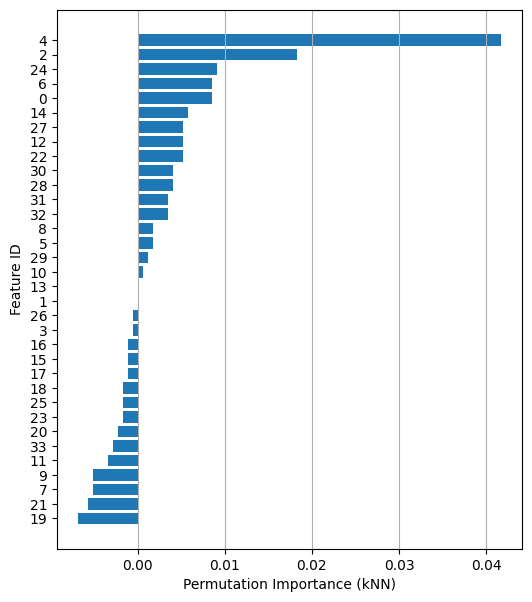

In [120]:
# Mengurutkan indeks pentingnya fitur dari yang terendah ke yang tertinggi
sorted_idx = knn_perm.importances_mean.argsort()

# Membuat gambar (figure) dan sumbu (axis) dengan ukuran 6x7 inci
fig, ax = plt.subplots(figsize=(6, 7))

# Membuat diagram batang horizontal untuk menampilkan pentingnya fitur
ax.barh(ion_data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1)

# Menampilkan garis grid pada sumbu x
ax.xaxis.grid(True)

# Menyertakan label sumbu-y, sumbu-x, dan judul plot
ax.set_ylabel("Feature ID")
ax.set_xlabel("Permutation Importance (kNN)")

# Menyimpan gambar (plot) sebagai file 'PIscores.png'
ax.figure.savefig("PIscores.png")

**Buat mask**

In [121]:
# Membuat mask (maskara) berdasarkan nilai pentingnya fitur yang lebih dari 0
mask = knn_perm.importances_mean[sorted_idx] > 0

# Memilih fitur-fitur yang memiliki pengaruh positif dengan menggunakan mask
PI_features = ion_data.columns[sorted_idx][mask]

# Memilih hanya fitur-fitur yang dipilih dari dataset asli 'X'
X_PI = X[PI_features]

# Mencetak jumlah fitur yang dipilih
print("Permutation Importance selects", X_PI.shape[1], "features.")

# Melakukan penskalaan MinMaxScaler pada dataset fitur-fitur yang dipilih
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)

# Memisahkan data fitur-fitur yang dipilih menjadi subset pelatihan dan pengujian
X_PI_train, X_PI_test, y_PI_train, y_PI_test = train_test_split(X_PI_scaled,
                                                               y, random_state=2,
                                                               test_size=1/2)

Permutation Importance selects 18 features.


**Hitung kembali Akurasi**

In [122]:
# Membuat objek KNeighborsClassifier dengan jumlah tetangga terdekat (n_neighbors) sebanyak 3
knnPI = KNeighborsClassifier(n_neighbors=3)

# Melatih model KNN dengan data pelatihan yang hanya menggunakan fitur-fitur yang dipilih melalui Permutation Importance (PI)
knnPI = knnPI.fit(X_PI_train, y_PI_train)

# Memprediksi target pada data pengujian yang hanya menggunakan fitur-fitur yang dipilih melalui PI
y_pred_PI = knnPI.predict(X_PI_test)

# Mengukur akurasi model yang hanya menggunakan fitur-fitur yang dipilih melalui PI dengan membandingkan prediksi dengan label yang sebenarnya
acc_PI = accuracy_score(y_pred_PI, y_test)

# Menghitung akurasi melalui validasi silang dengan 8 lipatan (cv=8) untuk fitur-fitur yang dipilih melalui PI
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8)

# Menyimpan hasil akurasi validasi silang dan akurasi hold-out testing dalam DataFrame 'res_df'
res_df.loc['After PI']['X-Val'] = cv_acc_PI.mean()
res_df.loc['After PI']['Hold-Out'] = acc_PI

# Mencetak akurasi hasil validasi silang dan hold-out testing
print("X-Val on training PI Features: {0:.3f}".format(cv_acc_PI.mean()))
print("Hold-Out testing PI features: {0:.3f}".format(acc_PI))


X-Val on training PI Features: 0.880
Hold-Out testing PI features: 0.847


###**2. Wrapper Stage**

**Jalankan proses Wrapper menggunakan feature backward elimination.**

In [123]:
# Proses Wrapper menggunakan feature backward elimination
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction = "backward",
                                cv=10, tol=0.00001)
sfs.fit(X_PI_train, y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test= sfs.transform(X_PI_test)

**Hitung akurasi**

In [124]:
# Membuat objek KNeighborsClassifier dengan jumlah tetangga terdekat (n_neighbors) sebanyak 3
knnPIW = KNeighborsClassifier(n_neighbors=3)

# Melatih model KNN yang telah diperbaiki (dengan fitur yang dipilih oleh SFS) pada data pelatihan yang telah dimodifikasi
knnPIW = knnPIW.fit(X_PI_W_train, y_PI_train)

# Mencetak bentuk data pelatihan yang telah dimodifikasi
print(X_PI_W_train.shape)

# Memprediksi target pada data pengujian yang telah dimodifikasi
y_pred_PIW = knnPIW.predict(X_PI_W_test)

# Mengukur akurasi model yang telah diperbaiki (dengan fitur yang dipilih oleh SFS) dengan membandingkan prediksi dengan label yang sebenarnya
acc_PIW = accuracy_score(y_pred_PIW, y_PI_test)

# Menghitung akurasi melalui validasi silang dengan 8 lipatan (cv=8) untuk model yang telah diperbaiki
cv_acc_PIW = cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8)

# Menyimpan hasil akurasi validasi silang dan akurasi hold-out testing dalam DataFrame 'res_df'
res_df.loc['After Wrapper']['X-Val'] = cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out'] = acc_PIW

# Mencetak akurasi hasil validasi silang dan hold-out testing
print("X-Val on training all features: {0:.3f}".format(cv_acc_PIW.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc_PIW))


(175, 16)
X-Val on training all features: 0.897
Hold Out testing all features: 0.847


**Plot semua hasil**

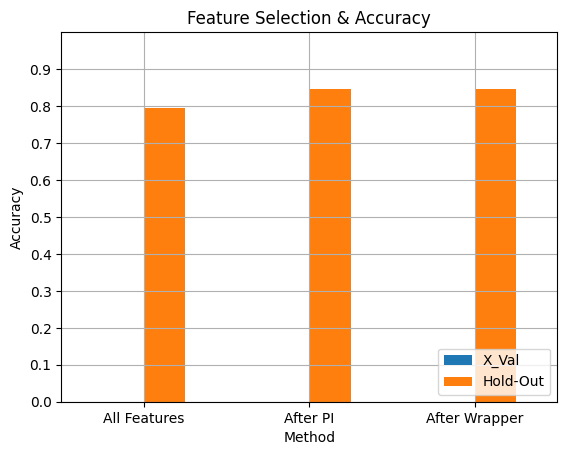

In [125]:
# Membuat grafik batang dari DataFrame 'res_df'
ax = res_df.plot.bar(rot=0)

# Menyertakan label sumbu-y, judul grafik, dan mengatur batas dan label sumbu-y
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0, 1)  # Mengatur batas sumbu-y antara 0 dan 1
ax.set_yticks(np.arange(0, 1, 0.1))  # Menyertakan tanda sumbu-y dari 0 hingga 1 dengan interval 0.1

# Menampilkan legenda grafik di sudut kanan bawah
ax.legend(loc='lower right')

# Menampilkan grid pada grafik
ax.grid(True)

# Menyimpan grafik sebagai file 'PI+Wrapper.png'
ax.figure.savefig("PI+Wrapper.png")

#**b. Rangkum hasil dan analisis yang ada pada praktikum 1 dan jelaskan perbedaan kedua metode tersebut yaitu PCA dan LDA!**

**Rangkuman Hasil dan Analisis Praktikum 1:** \\
Dari prakktikum 1 yang sudh dilakukan didapati hasil dan analisis sebagi berikut :
Pada metode PCA digunakan dataset HarryPotterTT.csv dan didapati bahwa bentuk frame data tersebut adalah (22,5), yang berarti data tersebut terdiri dri 22 baris dan 5 kolom. Kemudian dilakukan apply PCA yang menghasilkan rasio variansi yang dijelaskn oleh masing-masing komponen utama. Didapati rasio tersebut adalah array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ]). Setelah itu dilakukan pembuatan plot 4 varian PC. Berdasarkan plot dapat dilihat pada PC1 varian sebesr 0.5, pada PC2 sebesar 0.3, pada PC3 sebesar 0.1, dan pada PC4 sebesar 0.05.Selanjutnya dilakukan pembuatan plot persebaran data dengan PC1(49%) dan PC2(32%), dapat dilihat dari plot sebaran datanya kebanyakan berada diarea PC1.

Pada Metode LDA digunakan dataset penguins.csv dan dilakukan normalisasi terlebih dahulu menggunakan StandarsScaler. Pada dataset ini didapati bentuk dataset yaitu (333,4) yang berarti terdiri dari 333 baris dan 4 kolom. Kemudia dilakukan pembuatan plot dengan PC1(84%) dan PC2(16%). Dihasilkan plot terdiri dari 3 warna yaitu biru muda untuk Gantoo, Biru tua untuk Adelie, dan orange untuk Chinstrap. Pada LDA dihitung akurasinya, dan didapati akurasis ebesar 0.97%. Hal in imenunujukan bahwa data cocok dimodelkan oleh LDA. Nilai 0.97 berarti bahwa 97% dari semua data telah diklasifikasikan dengan benar oleh model LDA.

**Perbedaan pada teknik atau metode antara PCA dan LDA**
1. Perbedaan dataset yang digunakan pada PCA dan LDA. PCA menggunakan dataset Harrypotter dan LDA menggunakan dataset dataset Penguin.
2. Pada PCA data tidak dilakukan normalisasi, sedangkan pada LDA data dinormalisasikan terlebih dahulu
3. pada PCA ada perlakuan untuk mengurangi dimensi data namun sambil mempertahankan sebanyak mungkin variasi dalam data, seperti pada perlakuan ekstrak data sebelumnya. sedangkan pada LDA memaksimalkan pemisahan antara kelas atau grup dalam data
4. Adanya konsep data yang dipisah menjadi data train dan data testing pada penerapan LDA dan dilakukan transformasi pada data trainingnya, sedangkan pada PCA tidak
5. Pada PCA digunakan untuk pemilihan fitur karena itu mencoba untuk menemukan fitur-fitur yang paling relevan untuk klasifikasi, sehingga pada code sebelumnya kita lihat persebaran antara PCA1 PCA2 terhadapvariabel variabel. Sedangkan pada LDA tidak memandang pada pemilihan fitur tertentu, semua komponen utama dihasilkan tanpa memandang label kelas.



#**c. Dengan dataset penguins.csv gunakan model Filters dan Correlation Based Feature Selection (CFS). Kemudian rangkum hasil dan lakukan analisis!.**


##**FILTERS**

**Import packages**

In [126]:
import pandas as pd # Import library Pandas dengan alias 'pd' untuk manipulasi data tabular

# Import library NumPy dengan alias 'np' untuk operasi numerik
import numpy as np

# Import modul 'chi2' dan 'mutual_info_classif' untuk menghitung skor relevansi fitur terhadap target
from sklearn.feature_selection import chi2, mutual_info_classif

# Import fungsi 'train_test_split' untuk membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split

# Import kelas 'MinMaxScaler' untuk melakukan penskalaan fitur ke rentang (0, 1)
from sklearn.preprocessing import MinMaxScaler

# Import fungsi 'cross_val_score' untuk melakukan validasi silang guna mengevaluasi model machine learning
from sklearn.model_selection import cross_val_score

# Import library Matplotlib dengan alias 'plt' untuk membuat visualisasi grafis
import matplotlib.pyplot as plt

**Import Dataset**

In [127]:
# Membaca data dari file CSV "penguins.csv" ke dalam DataFrame.
penguins_data = pd.read_csv("penguins.csv")

# Menampilkan bentuk (shape) DataFrame 'penguins_data', yaitu jumlah baris dan kolom.
print(penguins_data.shape)

# Menampilkan lima baris pertama dari DataFrame 'penguins_data' untuk melihat data awal.
penguins_data.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


Jumlah baris yang didapatkan adalah 333 baris dan 6 kolom

**Mencari target value**

In [128]:
penguins_data['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Dapat dilihat berapa banyak kategorik yang ada pada satu atribut species, sehingga dapat dilihat ada 3 jenis penguins yaitu adelie berjumlah 146, Gentoo berjumlah 119, dan Chinstrap berjumlah 68.

**Split Data**

In [129]:
# Memisahkan kolom 'species' sebagai target (label) dan mengambil nilainya sebagai 'y'.
y = penguins_data.pop('species').values
X_raw = penguins_data.values

X_tr_raw, X_ts_raw, y_train, y_test  = train_test_split(X_raw, y,
                                                        random_state=1, test_size=1/2)
# Menerapkan penskalaan Min-Max menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
# Mendefinisikan nama fitur berdasarkan kolom DataFrame
feature_names = penguins_data.columns
X_train.shape, X_test.shape

((166, 5), (167, 5))

kita lakukan pemisahan pada kolom spesies dan kita targetkan atribut species tersebut sebagai nilai y (nilai tujuan)

**Feature Score**

In [130]:
chi2_score, pval =  chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score

array([23.27831336, 12.33320189, 13.04056372, 15.91528968, 13.39467176])

**score chi kuadratnya**

In [131]:
i_scores = mutual_info_classif(X_train, y_train)
i_scores

array([1.03689788, 0.62694997, 0.52071783, 0.63474087, 0.55739326])

**Simpan skor**

In [132]:
df = pd.DataFrame({'Mutual Info.':i_scores, 'Chi Square':chi2_score, 'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
Unnamed: 0,1.036898,23.278313
flipper_length,0.634741,15.915290
bill_length,0.626950,12.333202
body_mass,0.557393,13.394672
bill_depth,0.520718,13.040564


**Plot Score**

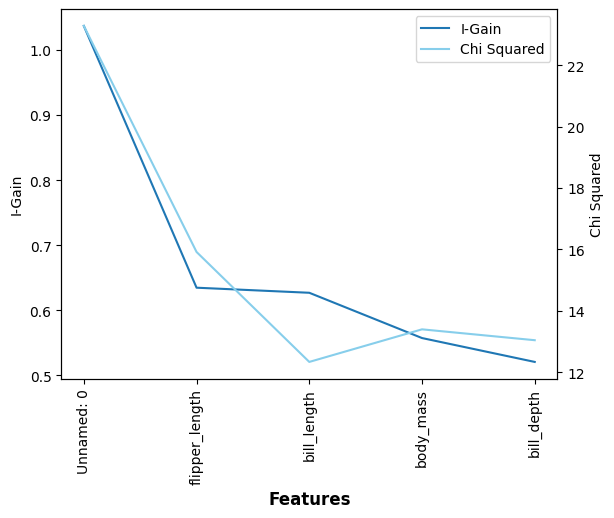

In [133]:
fig, ax = plt.subplots()
rr = range(0, len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df['Mutual Info.'], label='I-Gain')
ax2.plot(df.index, df['Chi Square'], color='skyblue', label='Chi Squared')
ax.set_xticks(rr)

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)

**Hitung Korelasi**

In [134]:
# Menghitung korelsi dengan spearmanr
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.7, pvalue=0.1881204043741873)

**Analisis Filters :** \\
Korelasi Spearman digunakan untuk mengukur hubungan monotonik (tidak linear) antara dua array, yaitu chi2_score dan i_scores. Hasil statistik dari perhitungan ini adalah 0,7, yang mengindikasikan bahwa ada hubungan yang cukup signifikan antara chi2_score dan i_scores. Selain itu, nilai p-value adalah 0,1881204043741873, yang menunjukkan signifikansi statistik yang cukup tinggi dalam pengujian ini. Semakin kecil nilai p-value, semakin signifikan secara statistik hasil pengujian.

##**Correlation Based Feature Selection  CFS**

In [135]:
# Import library Pandas dengan alias 'pd' untuk manipulasi data tabular
import pandas as pd

# Import library NumPy dengan alias 'np' untuk operasi numerik
import numpy as np

# Import fungsi 'train_test_split' membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split

# Import kelas 'MinMaxScaler' untuk melakukan penskalaan fitur ke rentang (0, 1)
from sklearn.preprocessing import MinMaxScaler

# Import kelas 'KNeighborsClassifier' untuk membangun model klasifikasi berdasarkan metode K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Import fungsi 'accuracy_score' menghitung akurasi model klasifikasi
from sklearn.metrics import accuracy_score

# Import fungsi 'cross_val_score' untuk melakukan validasi silang guna mengevaluasi model machine learning
from sklearn.model_selection import cross_val_score

# Import library Matplotlib dengan alias 'plt' untuk membuat visualisasi grafis
import matplotlib.pyplot as plt

# Import fungsi 'MaxNLocator' untuk mengatur penanda sumbu pada plot
from matplotlib.ticker import MaxNLocator


In [136]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

In [137]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

In [138]:
penguins_df1  = pd.read_csv("penguins.csv")
print(penguins_df1.shape)
penguins_df1.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [139]:
y = penguins_df1.pop('species').values
X_raw = penguins_df1.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2) # Pembagian Data (Train-Test Split)
scaler = MinMaxScaler() # Objek scaler Min-Max yang akan digunakan untuk mengubah skala fitur-fitur
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((166, 5), (167, 5))

In [140]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 1.000
Hold Out testing all features: 1.000


#### **Forward Search - CFS**

In [141]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.34053677 0.34140439]
Selected Feature index: (0, 3)


In [142]:
# Print the selected features
feature_names_sel = penguins_df1.columns[np.array(sel_comb)]
feature_names_sel

Index(['Unnamed: 0', 'flipper_length'], dtype='object')

**Evaluate on test data**

In [143]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.988
Hold Out testing selected features: 1.000



### **Best First Search - CFS**

In [144]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([0, 3, 1, 2, 4])

In [145]:
# Print the names of the features selected
feature_names_sel = penguins_df1.columns[Sel_feat]
feature_names_sel

Index(['Unnamed: 0', 'flipper_length', 'bill_length', 'bill_depth',
       'body_mass'],
      dtype='object')

In [146]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.3405367650586217,
 0.34140438602544737,
 0.34135154379629856,
 0.3315979801428004,
 0.3247704646387883]

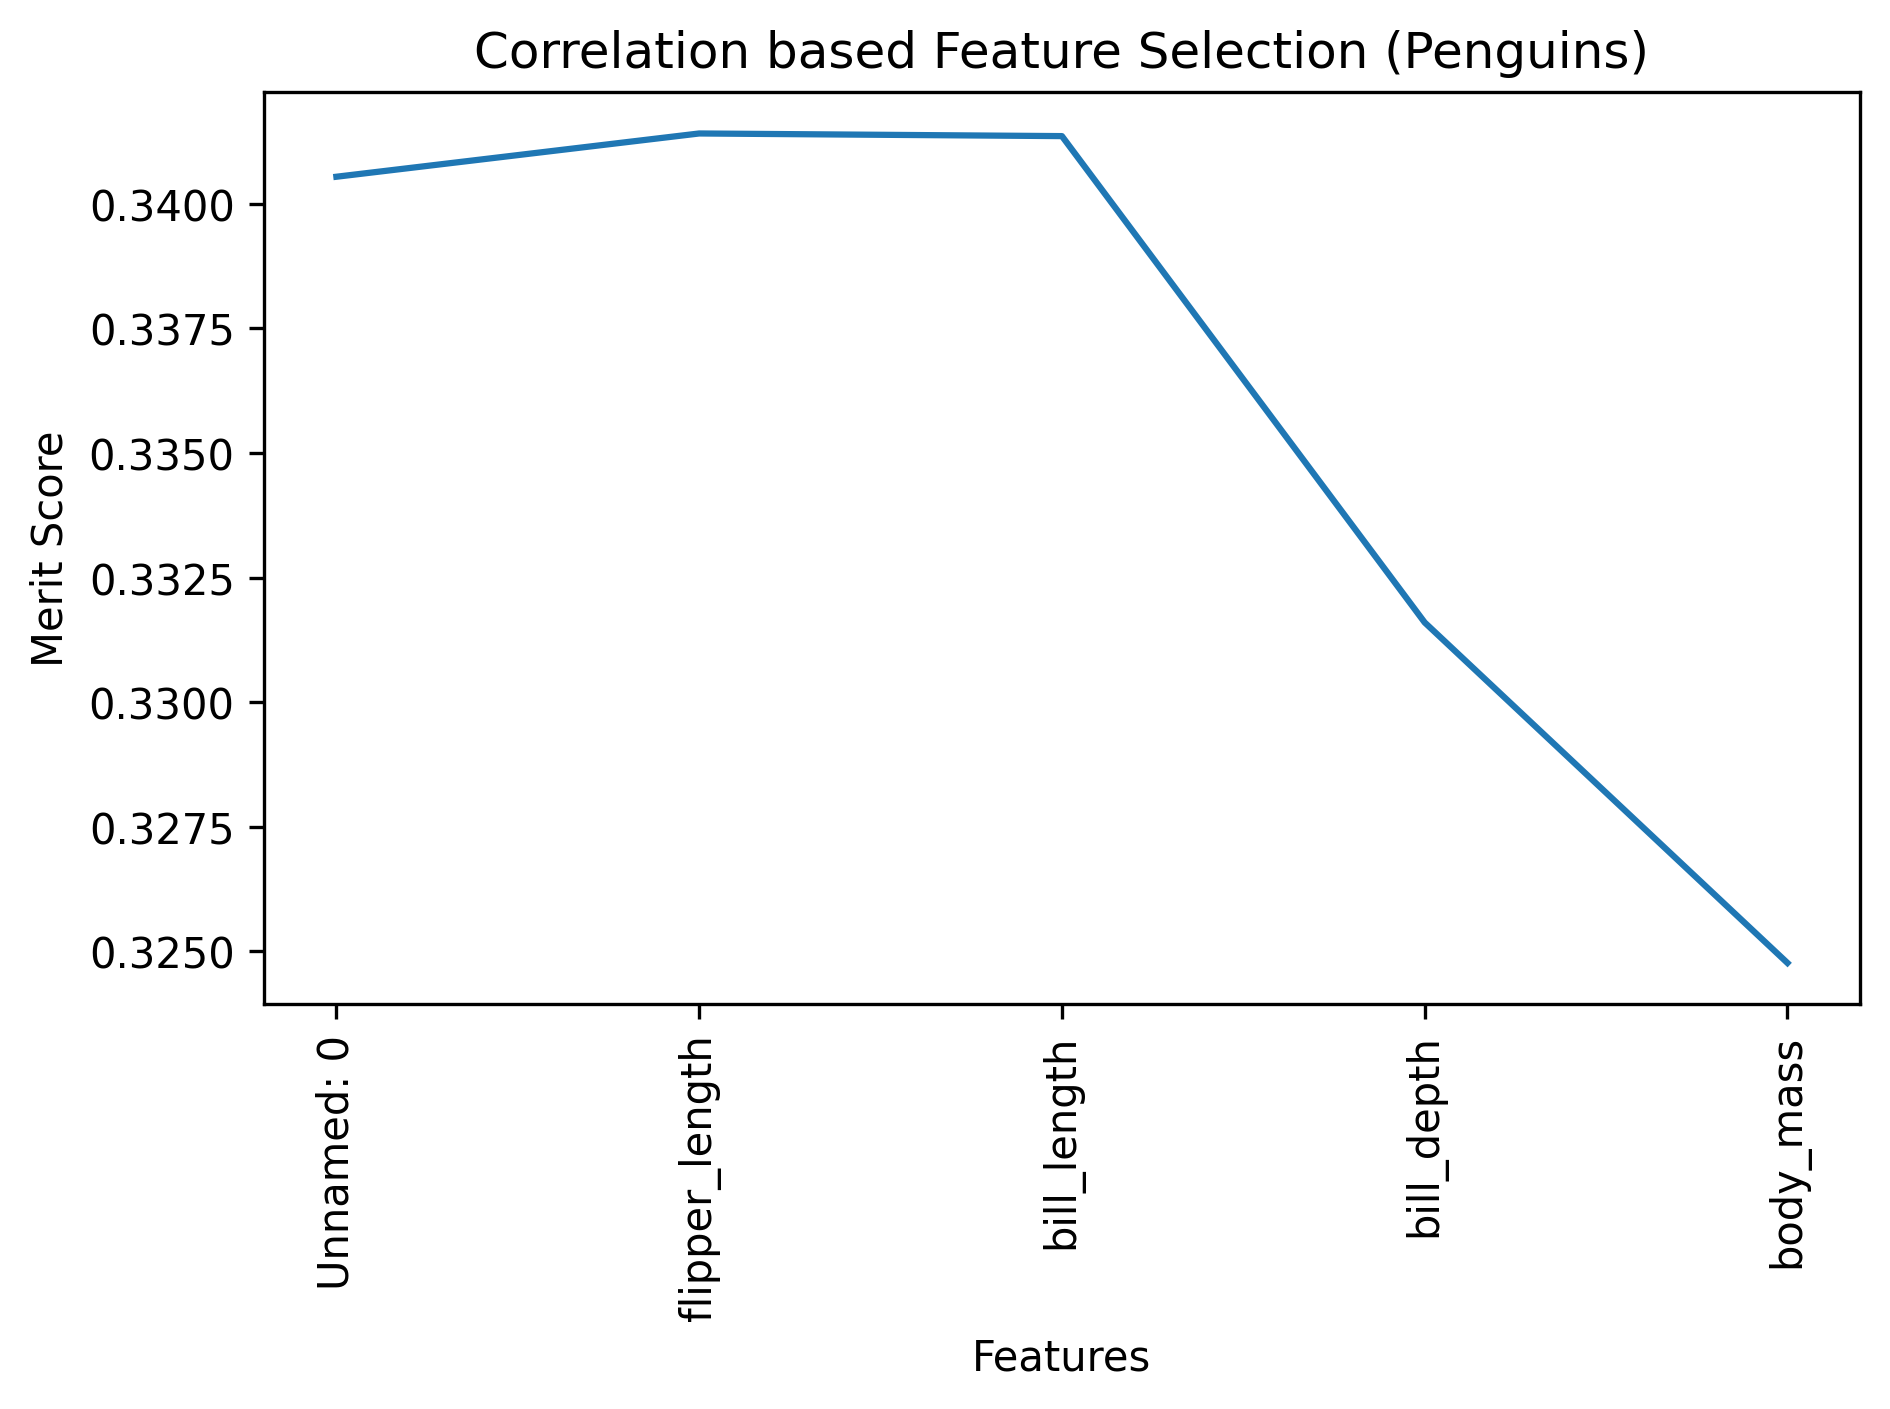

In [147]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Penguins)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

Visualisasi diatas dapat disimpulkan bahwa semakin tinggi merit score, maka atribut tersebut memiliki pengaruh yang lebih besar atau fiturnya lebih penting dalam pemodelan. Oleh karena itu, dari berbagai fitur yang ditampilkan di atas, dapat dilihat bahwa variabel "bill_length" memiliki nilai merit score tertinggi dibandingkan dengan variabel lainnya. Ini menandakan bahwa "bill_length" adalah fitur yang paling signifikan dalam mempengaruhi akurasi model.

**Evaluate on test data**

In [148]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 1.000
Hold Out testing selected features: 1.000


**Plot result**


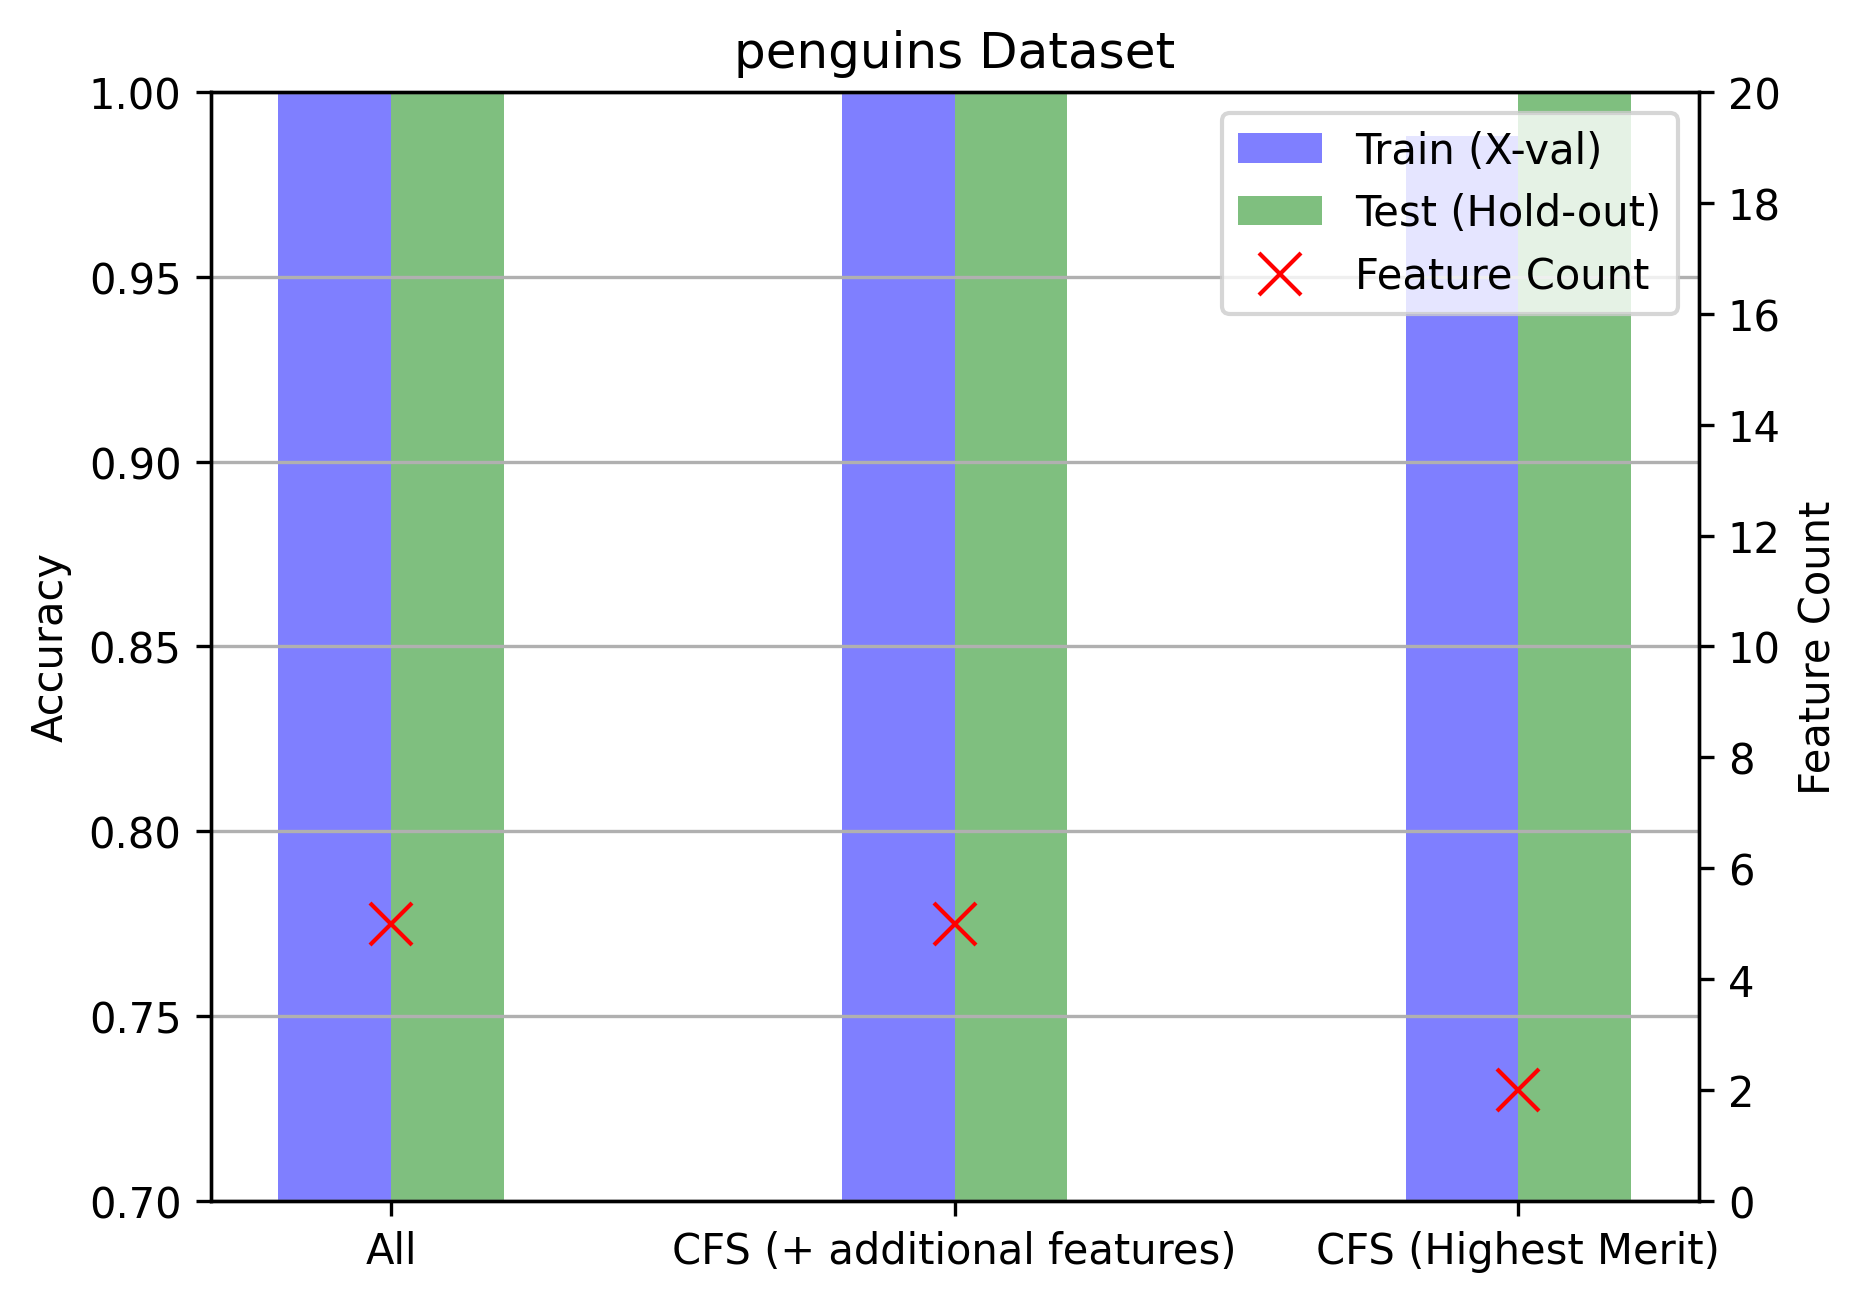

In [149]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("penguins Dataset")
plt.show()

Diagram diatas memberikan gambaran tentang akurasi pada dua jenis dataset yang berbeda dengan menggunakan jumlah fitur yang beragam sebagai variabel.

Bar pertama (berwarna biru) menunjukkan tingkat akurasi dari model pada data latih, yang disebut "Train (X-val)". Bar kedua (berwarna hijau) menunjukkan tingkat akurasi dari model pada data uji, yang disebut "Test (Hold-out)". Garis merah menggambarkan berapa banyak fitur yang digunakan dalam pemodelan untuk setiap opsi pada sumbu horizontal (x).

Sumbu kiri (biru) adalah skala untuk mengukur akurasi, yang menunjukkan sejauh mana model memprediksi dengan benar. Semakin tinggi bar biru, semakin baik modelnya dalam memprediksi data.

Sumbu kanan (merah) adalah skala untuk jumlah fitur yang digunakan dalam model. Ini memberikan informasi tentang kompleksitas model. Semakin banyak fitur yang digunakan, semakin kompleks modelnya. Oleh karena itu, kita dapat melihat bagaimana akurasi berkaitan dengan jumlah fitur yang digunakan dalam analisis ini.

Secara keseluruhan, visualisasi ini membantu kita memahami bagaimana akurasi dipengaruhi oleh jumlah fitur dalam pemodelan pada kedua dataset, yaitu data latih dan data uji.

**Analisis CFS :**\
Pada forward search didapati nilai "X_Val on training selected features: 0.988" dan "Hold Out testing selected features: 1.000" . Hal ini menunjukan vahwa model yang digunakan sangat baik dalam melakukan prediksi pada kedua dataset, baik pada data latih maupun pada data uji, dengan akurasi yang sangat tinggi. Akurasi sekitar 0.988 atau 98,8% pada data latih dan akurasi 1.000 atau 100% pada data uji adalah tanda yang sangat positif bahwa model ini cocok untuk tugas klasifikasi yang dilakukan dengan fitur-fitur yang telah dipilih.
Pada Best First Search didapati nilai "X_Val on training selected features: 1.00" dan "Hold Out testing selected features: 1.000". Pada BFS juga dihasilkan visualisasi yang menunjukan semakin tinggi merit score, maka atribut tersebut memiliki pengaruh yang lebih besar atau fiturnya lebih penting dalam pemodelan. Selanjutnya terdapat juga plot yang menggambarkan mengenai akurasi, sebagaimana visualisasi ini membantu kita memahami bagaimana akurasi dipengaruhi oleh jumlah fitur dalam pemodelan pada kedua dataset, yaitu data latih dan data uji.

#**d. Dengan dataset Segmentasi gunakan model decison tree. Kemudian rangkum hasil dan lakukan analisis!**


**Import Packages**

In [150]:
# Import library Pandas dengan alias 'pd' untuk manipulasi data tabular
import pandas as pd

# Import library NumPy dengan alias 'np' untuk operasi numerik
import numpy as np

# Import fungsi 'train_test_split' untuk membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split

# Import fungsi 'cross_val_score' untuk melakukan validasi silang guna mengevaluasi model machine learning
from sklearn.model_selection import cross_val_score

# Import fungsi 'accuracy_score' untuk menghitung akurasi model klasifikasi
from sklearn.metrics import accuracy_score

# Import kelas 'DecisionTreeClassifier' untuk membangun model klasifikasi berdasarkan pohon keputusan (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Import modul 'tree' untuk visualisasi pohon keputusan (Decision Tree)
from sklearn import tree

# Import library Matplotlib dengan alias 'plt' untuk membuat visualisasi grafis
import matplotlib.pyplot as plt


**Import Dataset**

In [151]:
segmentation_df = pd.read_csv("segmentation-all.csv")

feature_names = segmentation_df.columns
print(segmentation_df.shape)
segmentation_df.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


**Hitung data pada variabel target**

In [152]:
segmentation_df['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

**Split data**

In [153]:
y = segmentation_df.pop('Class').values
X = segmentation_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1, test_size=1/2)

feature_names = segmentation_df.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

**Tree with no pruning**

In [154]:
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Test set accuract %4.2f' % (acc))

Test set accuract 0.95


**Plot D-Tree**

[Text(0.7695652173913043, 0.9583333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.6086956521739131, 0.875, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.391304347826087, 0.7916666666666666, 'HUE-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.1391304347826087, 0.7083333333333334, 'HUE-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.05217391304347826, 0.625, 'SATURATION-MEAN <= 0.478\n82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.034782608695652174, 0.5416666666666666, 'EXGREEN-MEAN <= -10.0\n3\n[0, 1, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.017391304347826087, 0.4583333333333333, '1\n[0, 1, 0, 0, 0, 0, 0]\nSKY'),
 Text(0.05217391304347826, 0.4583333333333333, '2\n[0, 0, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.06956521739130435, 0.5416666666666666, '79\n[0, 0, 79, 0, 0, 0, 0]\nFOLIAGE'),
 Text(0.22608695652173913, 0.625, 'RAWRED-MEAN <= 2.611\n226\n[3, 19, 65, 0, 0, 0, 139]

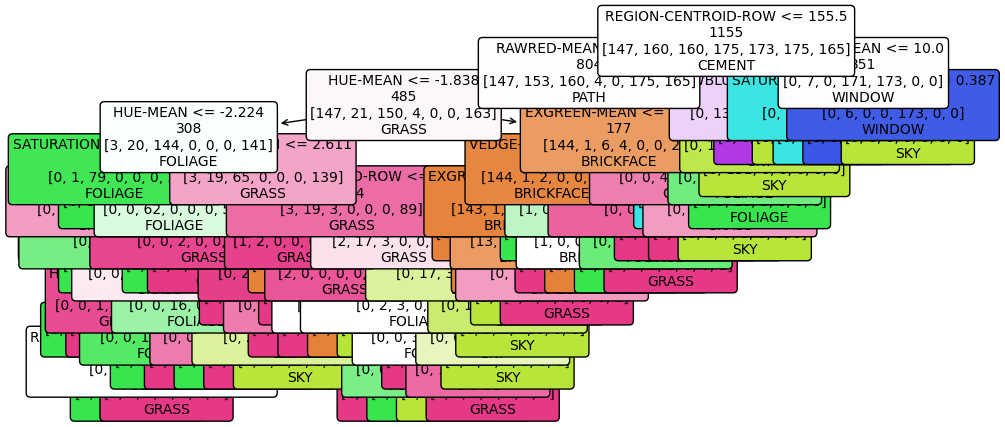

In [155]:
plt.figure(figsize=(11, 5))
tree.plot_tree(ftree, fontsize = 10, feature_names = feature_names,
               class_names=['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT', 'WINDOW', 'PATH', 'GRASS'],
               label = 'none', filled=True, impurity = False,
               rounded=True)

**Tampilkan fitur penting**

In [156]:
fi = ftree.feature_importances_

for fi_val, f_name in zip(fi, feature_names):
  print(' %4.2f %s' % (fi_val, f_name))

 0.01 REGION-CENTROID-COL
 0.31 REGION-CENTROID-ROW
 0.00 REGION-PIXEL-COUNT
 0.00 SHORT-LINE-DENSITY-5
 0.00 SHORT-LINE-DENSITY-2
 0.01 VEDGE-MEAN
 0.00 VEDGE-SD
 0.00 HEDGE-MEAN
 0.01 HEDGE-SD
 0.00 INTENSITY-MEAN
 0.22 RAWRED-MEAN
 0.10 RAWBLUE-MEAN
 0.00 RAWGREEN-MEAN
 0.00 EXRED-MEAN
 0.11 EXBLUE-MEAN
 0.04 EXGREEN-MEAN
 0.00 VALUE-MEAN
 0.02 SATURATION-MEAN
 0.16 HUE-MEAN


**Jumlah Daun**

In [157]:
ftree.get_n_leaves()

49

**Penggunaan 10 pohon**

In [158]:
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 10)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
accc = accuracy_score(y_pred, y_test)
print('Test set accuract %4.2f' % (acc))


Test set accuract 0.95


**Plot D-Tree**

[Text(0.671875, 0.9166666666666666, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.46875, 0.75, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.25, 0.5833333333333334, 'HUE-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.125, 0.4166666666666667, 'HUE-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.0625, 0.25, '82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.1875, 0.25, 'RAWRED-MEAN <= 2.611\n226\n[3, 19, 65, 0, 0, 0, 139]\nGRASS'),
 Text(0.125, 0.08333333333333333, '112\n[0, 0, 62, 0, 0, 0, 50]\nFOLIAGE'),
 Text(0.25, 0.08333333333333333, '114\n[3, 19, 3, 0, 0, 0, 89]\nGRASS'),
 Text(0.375, 0.4166666666666667, 'EXGREEN-MEAN <= -4.944\n177\n[144, 1, 6, 4, 0, 0, 22]\nBRICKFACE'),
 Text(0.3125, 0.25, '150\n[144, 1, 2, 0, 0, 0, 3]\nBRICKFACE'),
 Text(0.4375, 0.25, '27\n[0, 0, 4, 4, 0, 0, 19]\nGRASS'),
 Text(0.6875, 0.5833333333333334, 'VALUE-MEAN <= 101.778\n319\n[0, 132, 10, 0

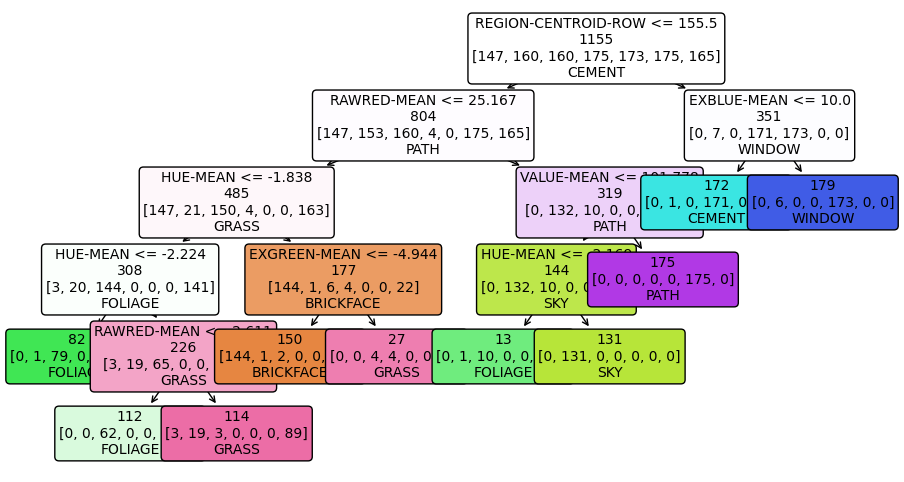

In [159]:
plt.figure(figsize=(11, 6))

tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
               class_names=['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT', 'WINDOW', 'PATH', 'GRASS'],
               label = 'none', filled=True, impurity = False,
               rounded = True)

**Menampilkan fitur penting**

In [160]:
fi = p_tree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
  print(" %4.2f %s" % (fi_val, f_name))

 0.00 REGION-CENTROID-COL
 0.33 REGION-CENTROID-ROW
 0.00 REGION-PIXEL-COUNT
 0.00 SHORT-LINE-DENSITY-5
 0.00 SHORT-LINE-DENSITY-2
 0.00 VEDGE-MEAN
 0.00 VEDGE-SD
 0.00 HEDGE-MEAN
 0.00 HEDGE-SD
 0.00 INTENSITY-MEAN
 0.24 RAWRED-MEAN
 0.00 RAWBLUE-MEAN
 0.00 RAWGREEN-MEAN
 0.00 EXRED-MEAN
 0.12 EXBLUE-MEAN
 0.03 EXGREEN-MEAN
 0.11 VALUE-MEAN
 0.00 SATURATION-MEAN
 0.16 HUE-MEAN


**Analisis :**

**Tree Without Pruning**
1. Pada visualisasi terlihat bahwa terdapat banyak daun dalam pohon yang disajikan, dan visualisasinya cenderung acak tanpa adanya pemangkasan.
2. Visualisasi ini menggambarkan penggunaan model pohon keputusan tanpa menerapkan pemangkasan (pruning) terhadap pohon tersebut. Oleh karena itu, pohon tersebut cenderung memiliki banyak daun tanpa adanya pemangkasan.
3. Model pohon keputusan memiliki struktur hierarki dengan banyak percabangan (node) dan daun (leaf), di mana setiap node mewakili keputusan atau kondisi berdasarkan fitur-fitur dari data.
4. Tanpa pemangkasan, pohon dapat menjadi sangat dalam dan kompleks, mencoba untuk memisahkan data hingga level yang sangat detail. Hal ini dapat mengakibatkan overfitting, yaitu model yang sangat cocok dengan data latih tetapi buruk dalam menggeneralisasi data baru.
5. Pohon tanpa pemangkasan cenderung besar dan rumit, seperti yang terlihat pada visualisasi ini.

**D-Tree**
1. Visualisasi D-Tree menggambarkan struktur pohon keputusan yang telah dibuat, termasuk detail seperti tingkat keputusan di setiap node dan fitur-fitur yang digunakan untuk membagi data di setiap percabangan.
2. Plot D-Tree membantu dalam pemahaman dan analisis pohon keputusan yang telah dibuat. Visualisasi ini memungkinkan kita untuk melihat dengan jelas bagaimana model membuat keputusan berdasarkan fitur-fitur dan menampilkan struktur hierarki dari pohon tersebut.

Dapat disimpulkan Tree Without Pruning menunjukkan pohon keputusan dalam keadaan tidak dipangkas, sementara D-Tree memberikan gambaran yang lebih terstruktur tentang bagaimana pohon keputusan telah dibentuk dengan tingkat keputusan di setiap node dan fitur-fitur yang digunakan dalam proses pemisahan data.




#**E. Carilah dataset selain dataset yang digunakan dalam praktikum ini kemudian gunakan metode Permutation Feature Importance dan Wrapper. Rangkum hasil, analisis, dan berikan kesimpulan !**

**Import Packages**

In [161]:
# Import library Pandas dengan alias 'pd' untuk manipulasi data tabular
import pandas as pd

# Import library NumPy dengan alias 'np' untuk operasi numerik
import numpy as np

# Import fungsi 'permutation_importance' untuk menghitung skor pentingnya fitur dengan metode permutasi
from sklearn.inspection import permutation_importance

# Import modul 'preprocessing' untuk transformasi dan penskalaan data
from sklearn import preprocessing

# Import fungsi 'accuracy_score' untuk menghitung akurasi model klasifikasi
from sklearn.metrics import accuracy_score

# Import fungsi 'cross_val_score' untuk melakukan validasi silang guna mengevaluasi model machine learning
from sklearn.model_selection import cross_val_score

# Import kelas 'KNeighborsClassifier' untuk membangun model klasifikasi berdasarkan metode K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Import fungsi 'train_test_split' untuk membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split

# Import library Matplotlib untuk membuat visualisasi grafis
import matplotlib.pyplot as plt

**Import Dataset**

In [162]:

# Membaca data dari file CSV dan menggantikan '?' dengan NaN.
dataku = pd.read_csv("/content/african_crises.csv")

# Menghapus baris yang memiliki nilai NaN.
dataku.dropna(axis=0, inplace=True)

# Menampilkan bentuk (shape) DataFrame dan lima baris pertama.
print(dataku.shape)
dataku.head()

(1059, 14)


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [163]:
print(dataku)

      case  cc3   country  year  systemic_crisis    exch_usd  \
0        1  DZA   Algeria  1870                1    0.052264   
1        1  DZA   Algeria  1871                0    0.052798   
2        1  DZA   Algeria  1872                0    0.052274   
3        1  DZA   Algeria  1873                0    0.051680   
4        1  DZA   Algeria  1874                0    0.051308   
...    ...  ...       ...   ...              ...         ...   
1054    70  ZWE  Zimbabwe  2009                1  354.800000   
1055    70  ZWE  Zimbabwe  2010                0  378.200000   
1056    70  ZWE  Zimbabwe  2011                0  361.900000   
1057    70  ZWE  Zimbabwe  2012                0  361.900000   
1058    70  ZWE  Zimbabwe  2013                0  361.900000   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0   
2                            0

**Ubah data jadi numerik**

In [164]:
from sklearn.preprocessing import LabelEncoder
kategorik = ['cc3','country']

label_encoder = LabelEncoder()

for i in kategorik :
  dataku[i] = label_encoder.fit_transform(dataku[i])

dataku.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,3,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,3,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,3,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,3,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


**Split data**

In [165]:
# Melakukan split data
y = dataku.pop('banking_crisis').values
X = dataku
pima_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = pima_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2, test_size = 1/2)

**Final results dataframe**

In [166]:
# Mendapatkan hasil final dengan dataframe
res_df1 = pd.DataFrame([['All Features', 0.0, 0.0],
                        ['After PI', 0.0, 0.0],
                        ['After Wrapper', 0.0, 0.0]], columns=['Method', 'X-Val', 'Hold-Out'])

res_df1.set_index('Method', inplace = True)

**Akurasi**

In [167]:
# Menghitung akurasi dengan metode knn
kNN = KNeighborsClassifier(n_neighbors=3)
kNN = kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred, y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

res_df1.loc['All Features']['X-Val']=cv_acc.mean()
res_df1.loc['All Features']['Hold-Out']=acc
# Mencetak hasil training dan testing data untuk prediksi
print('X_val on training all features: {0:.3f}'.format(cv_acc.mean()))
print('Hold Out testing all features: {0:.3f}'.format(acc))

X_val on training all features: 0.968
Hold Out testing all features: 0.983


**Permutation feature importance stage**

In [168]:
# Melakukan permutasi data dengan knn
knn_perm1 = permutation_importance(kNN, X_train, y_train,
                                  n_repeats=10, random_state = 0)

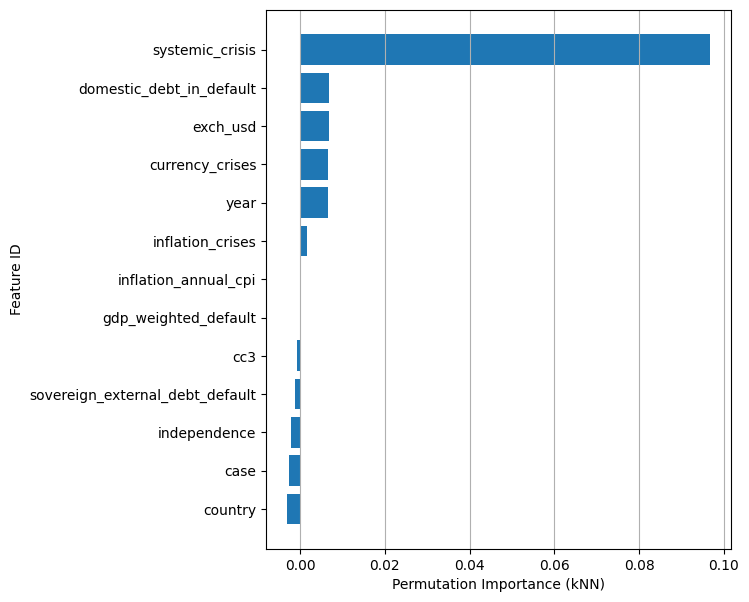

In [169]:
# Membuat visualisasi plot
sorted_idx = knn_perm1.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(6, 7))
ax.barh(dataku.columns[sorted_idx], knn_perm1.importances_mean[sorted_idx], zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel('Feature ID')
ax.set_xlabel('Permutation Importance (kNN)');
ax.figure.savefig('PIscores.png')

**Buat mask**

In [170]:
mask = knn_perm1.importances_mean[sorted_idx]>0

In [171]:
PI_features = dataku.columns[sorted_idx][mask]

In [172]:
# Memperoleh informasi penting dari permutasi data
X_PI = X[PI_features]
print('Permutation Importance selects', X_PI.shape[1], 'features.')
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)
X_PI_train, X_PI_test, y_PI_train, y_PI_test = train_test_split(X_PI_scaled, y, random_state=2, test_size=1/2)

Permutation Importance selects 6 features.


**Hitung kembali Akurasi**

In [173]:
# Menghitung akurasi kembali berdasarkan dat test dan data latih
knnPI = KNeighborsClassifier(n_neighbors=3)
knnPI = knnPI.fit(X_PI_train, y_PI_train)

y_pred_PI = knnPI.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI, y_test)
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8)

res_df1.loc['After PI']['X-Val']=cv_acc_PI.mean()
res_df1.loc['After PI']['Hold-Out']=acc_PI

print('X_Val on training PI features: {0:.3f}'.format(cv_acc_PI.mean()))
print('Hold Out testing PI features: {0:.3f}'.format(acc_PI))

X_Val on training PI features: 0.974
Hold Out testing PI features: 0.979


**Analisis**:\
Pada praktikum ini saya menggunakan data mengenai krisis diafrika yang terdiri dari 13 prediktor dan satu target(banking_crisis). Ada beberapa tahapan yang dilakukan yaitu melakukan import package, dan upload dataset menjadi data frame pada dan kita ubah menjadi data numerik bagi data yang masih memiliki atribut kategorik menggunakan label encoding. Lalu lakukan split dataset untuk membagi menjadi data train dan data testing.\
cc3, sovereign_external_debt_default, independence, case, dan country didapati permutation importance kurang dari 0, inflation_annual_cpi dan gdp_weighted_default sama dengan 0, dan inflation_crises,exch_usd, domestic_debt_in_default, dan system_crisis lebih dari 0. Dengan systemic_crisis permutation importance terbesar kurang lebih 0.98.Kemudian dapat diketahui bahwa terdapat 6 permutation importance yang berarti terdapat 6 variabel yang memiliki ampak atau penting dalam membuat prediksi dengan model tertentu.Setelah dilakukan Permuation importance, dihitung kembali akurasinya, dan didapati akurasi pada data latih sebesar 0.974 dan pada data uji sebesar 0.979. Hal ini menunjukan bahwa terdapat perubahan akurasi setelah dilakukan permutation importance.